In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file =pd.read_csv("Salaries.csv")

In [5]:
file

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [6]:
file.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [8]:
file.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [9]:
file.columns.size

6

In [10]:
file.index

RangeIndex(start=0, stop=397, step=1)

In [11]:
file.iloc[2:10]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [12]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [14]:
file2 =pd.read_csv("Salaries.csv" , index_col='salary')

In [15]:
file2

,rank,discipline,yrs.since.phd,yrs.service,sex
salary,,,,,
139750,Prof,B,19,18,Male
173200,Prof,B,20,16,Male
79750,AsstProf,B,4,3,Male
115000,Prof,B,45,39,Male
141500,Prof,B,40,41,Male
...,...,...,...,...,...
103106,Prof,A,33,30,Male
150564,Prof,A,31,19,Male
101738,Prof,A,42,25,Male


In [16]:
file.shape

(397, 6)

In [17]:
file.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [18]:
file.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

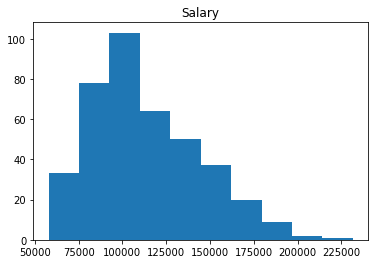

In [20]:
file['salary'].hist(grid=False)
plt.title("Salary")
plt.show()

In [21]:
file['salary'].value_counts()

92000     5
72500     4
74000     4
105000    3
101000    3
         ..
76840     1
83001     1
113278    1
155500    1
81035     1
Name: salary, Length: 371, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
LE =LabelEncoder()
file["salary"]=LE.fit_transform(file["salary"])

In [23]:
LE.inverse_transform([1,0])

array([62884, 57800], dtype=int64)

In [24]:
LE.inverse_transform([0,1])

array([57800, 62884], dtype=int64)

In [25]:
file['salary'].value_counts()

90     5
13     4
20     4
156    3
130    3
      ..
28     1
54     1
199    1
334    1
44     1
Name: salary, Length: 371, dtype: int64

In [27]:
file.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.427525
yrs.service,0.909649,1.000000,0.346769
salary,0.427525,0.346769,1.000000


In [29]:
corr_matrix =file.corr()
corr_matrix['salary'].sort_values(ascending= False )

salary           1.000000
yrs.since.phd    0.427525
yrs.service      0.346769
Name: salary, dtype: float64

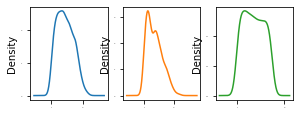

In [43]:
file.plot(kind='density', subplots= True ,layout=(6,11) ,sharex=False ,legend=False , fontsize=1 , figsize=(18,12))
plt.show()

In [32]:
x = file.drop("salary",axis=1)
y = file["salary"]

In [33]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,Prof,B,19,18,Male
1,Prof,B,20,16,Male
2,AsstProf,B,4,3,Male
3,Prof,B,45,39,Male
4,Prof,B,40,41,Male
...,...,...,...,...,...
392,Prof,A,33,30,Male
393,Prof,A,31,19,Male
394,Prof,A,42,25,Male
395,Prof,A,25,15,Male


In [34]:
y

0      289
1      355
2       39
3      209
4      293
      ... 
392    140
393    321
394    135
395    103
396     44
Name: salary, Length: 397, dtype: int64

In [35]:
x.skew().sort_values(ascending = False )

C:\Users\user\AppData\Local\Temp/ipykernel_1248/73073388.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x.skew().sort_values(ascending = False )


yrs.service      0.650569
yrs.since.phd    0.300880
dtype: float64